In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1 style="background-color: #FFFF00">Only Marked Parts need to be changed</h1>

# Experiment-Definition

For every attack, we define a set of attack arguments (e.g. epsilon for FGSME) 

| Attack          |Parameter   |         |           |       |      |      |      |      |      |      |      |
|-----------------|------------|---------|-----------|-------|------|------|------|------|------|------|------|
| FGSME           |$\epsilon$  | 0       | 0.001     | 0.002 | 0.005| 0.01 | 0.02 | 0.05 |  0.1 |  0.2 |  0.5 | 
| FGA (L2)        |$\epsilon$  | 0       |  1        |  2    |  5   |  10  |  20  |  50  |  75  | 100  | 150  | 
| FGA (L1)        |$\epsilon$  | 0       |  100      |  200  |  500 | 1000 | 2000 | 5000 | 1e4  | 2e4  |  5e4 | 
| Volume Atk      |$\epsilon$  | 0       |  10       |  20   |  30  | 40   | 50   | 60   | 70   | 80   |  90  | 
|Interpolation Atk| tbd | 
| Time Stretch Atk|`num_iter`  | 1       | 2         | 3     | 4    |
| Pitch Atk       |`num_iter`  | 1       | 2         | 3     | 4    |

The experiment setup for these values is defined below.

As a first *robustness-criteria* we sum the success rates for each model for all attack configurations.

In [5]:
##############################################################################################################
##############################################################################################################
##############################################################################################################
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
import attacks
from attacks.FGA_Batch import fast_gradient_attack
from attacks.pgd import ProjectedGradientDescent
from attacks.speed import TimeStretchAttack
from attacks.volume import VolumeAttack
from attacks.pitch import PitchAttack
import attacks.functionalVolume

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule

exp_config = [{'attack_fn': attacks.pgd.ProjectedGradientDescent,
  'attack_arg': {'norm': ['inf'],
   'epsilon': [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]},
  'meta': {'key_result': 'success_rate',
   'key_config': 'epsilon',
   'title': 'FGSM'}},
 {'attack_fn': attacks.pgd.ProjectedGradientDescent,
  'attack_arg': {'norm': ['inf'],
   'epsilon': [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5],
   'num_iter': [2]},
  'meta': {'key_result': 'success_rate',
   'key_config': 'epsilon',
   'title': 'FGSM_2_Iter'}},
 {'attack_fn': attacks.functionalVolume.FunctionalVolumeAttack,
  'attack_arg': {'norm': ['inf'],
   'epsilonPGD': [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5],
   'epsilonVolume': [0.1],
   'num_iter': [2]},
  'meta': {'key_result': 'success_rate',
   'key_config': 'epsilonPGD',
   'title': 'FunctionalVolumeAttack'}}]
##############################################################################################################
#experiment = RobustnessExperiment(exp_config, title="Evaluation_Final")
##############################################################################################################

# Run Experiment

When new models are evaluted, execute `experiment.run(<model_path>, <model_class>)`

<h1 style="background-color: #FFFF00">ToDo: Add new Models here!</h1>


Loaded model 0015_Evaluation_Final
Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


  0%|          | 0/10 [00:00<?, ?it/s]



Running experiment on model M5_smoothed_sigma=1.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/M5_smoothed_sigma=1.p'

Perform Attack #1/3: FGSM


100%|██████████| 10/10 [00:34<00:00,  3.45s/it]


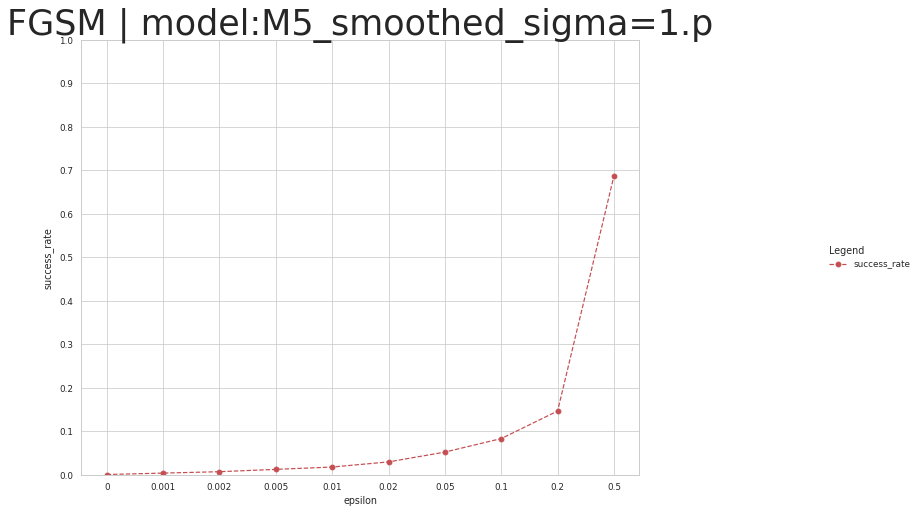

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #2/3: FGSM_2_Iter


100%|██████████| 10/10 [00:48<00:00,  4.86s/it]


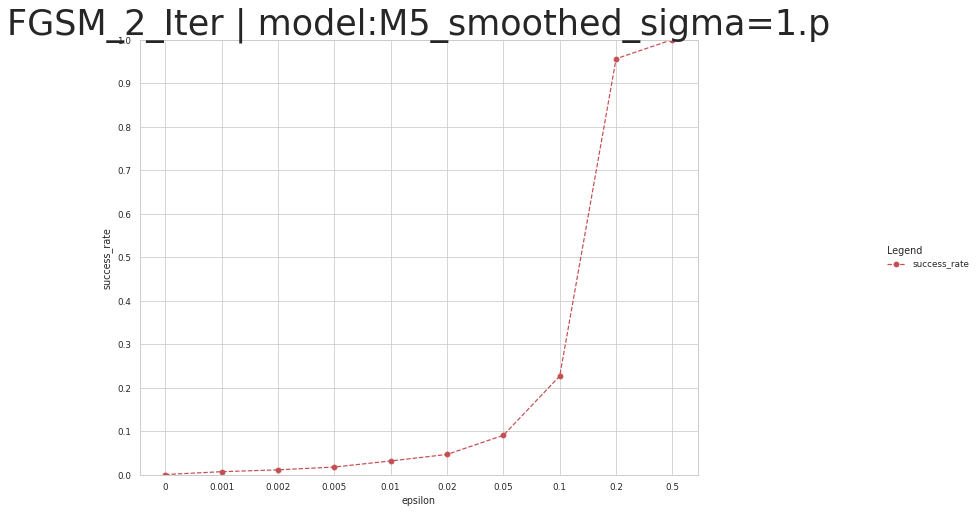

  0%|          | 0/10 [00:00<?, ?it/s]

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"

Perform Attack #3/3: FunctionalVolumeAttack


100%|██████████| 10/10 [00:50<00:00,  5.08s/it]


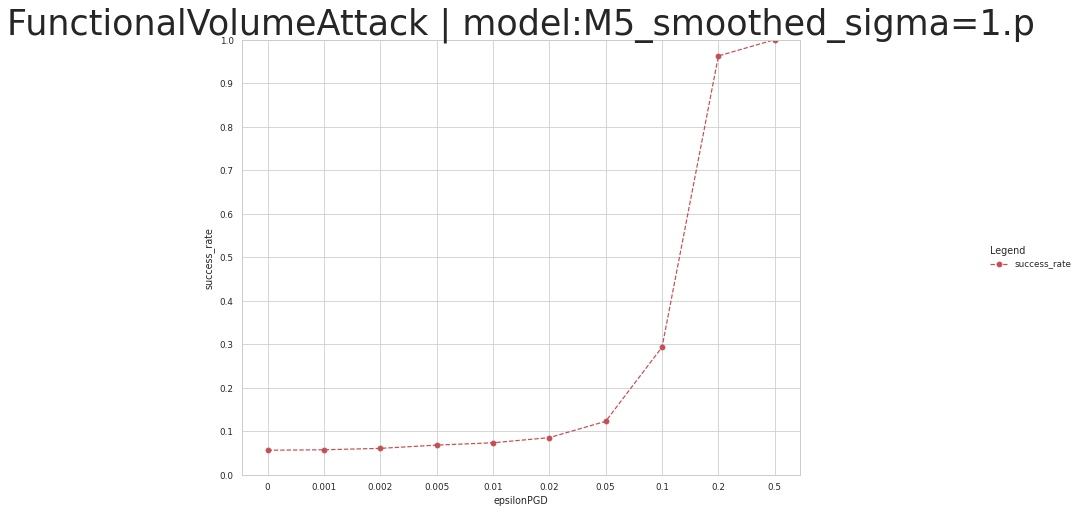

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0015_Evaluation_Final/backup.pickle"


In [7]:
experiment = load_experiment(exp_folder = "0015_Evaluation_Final")
#experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN/SpectrogramCNN_attack_Spectogram_v6.p", SpectrogramCNNPLModule)
experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/M5/M5_smoothed_sigma=1.p", M5PLModule)
#experiment.run("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/DeepRecursiveCNN/DeepRecursiveCNN_vanilla.p", DeepRecursiveCNNPLModule)

# Analysis
<h1 style="background-color: #FFFF00">Run to update graphs</h1>



### Show all evaluated models

In [8]:
experiment.show_evaluated_models()

['optuna_spectrogram',
 'M5_vanilla.p',
 'SpectrogramCNN_attack_Spectogram_v5.p',
 'SpectrogramCNN_attack_Spectogram_v6.p',
 'SpectrogramCNN_attack_Spectogram_v8.p',
 'M5_smoothed_sigma=1.p']

### Which model performs best in each attack?

In [ ]:
experiment.show_best_models(metric = "success_rate", best_n=1, limit_eps=6)

### Compare Models

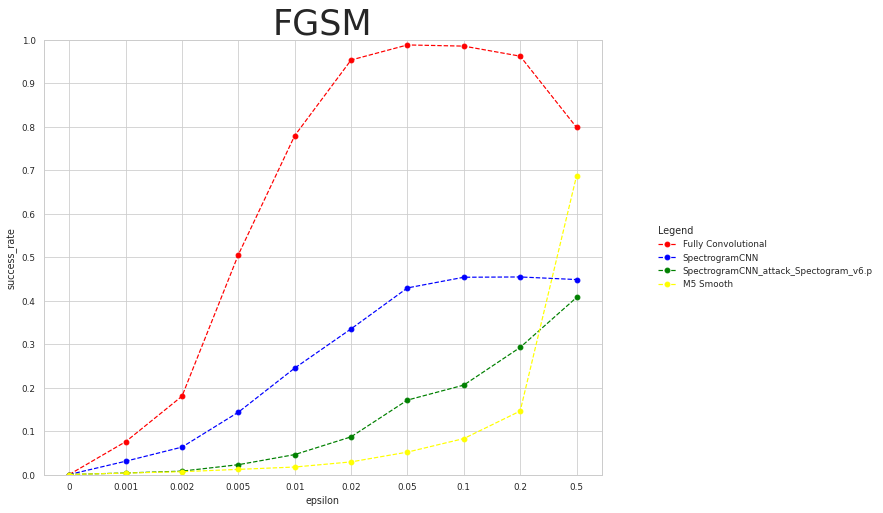

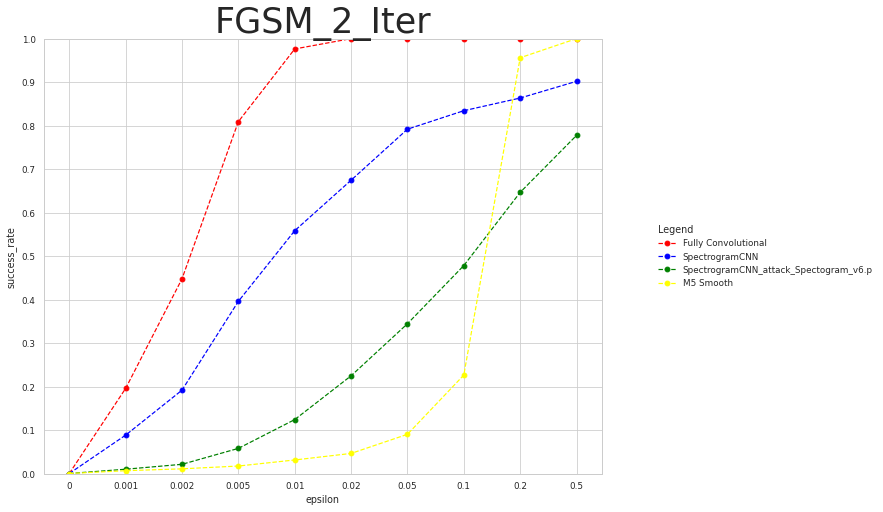

'epsilon'


In [9]:
experiment.compare(config_key = "epsilon", results_key = "success_rate", models=[('M5_vanilla.p', "Fully Convolutional"), 
                                                                                 ('optuna_spectrogram', "SpectrogramCNN"),
                                                                                 "SpectrogramCNN_attack_Spectogram_v6.p",
                                                                                 ("M5_smoothed_sigma=1.p", "M5 Smooth")
                                                                        ])

# Conclusion

The **M5 Model** is very prone to the first order gradient based attacks, with a peak success rate of ~95% in all attacks. However, adversarial training brings clear improvements.